In [559]:
# Import packages used by scouting system
import sys
import os
import re

import pandas as pd
import sqlalchemy as sa

In [560]:
# Import scouting system packages
import server.scouting.output as out
from server.scouting.event import EventDal

In [561]:
# Get a database connection
connection_string = ('postgresql://irs1318:irs1318'
                     '@localhost:5432/scouting')
engine = sa.create_engine(connection_string)
conn = engine.connect()

In [562]:
# This section is necessary for viewing plots in the notebook.
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline
matplotlib.style.use("ggplot")

In [563]:
# Set Current Event
current_event = "turing"
EventDal.set_current_event(current_event)

In [564]:
# Get Measures Dataframe
sql_measures = sa.text(
    "SELECT events.name AS event, matches.name AS match, levels.name AS level, dates.name AS date, "
    "teams.name AS team, alliances.name AS alliance, "
    "stations.name AS station, phases.name AS phase, actors.name AS actor, tasks.name AS task, "
    "measures.capability AS capability, measures.successes as successes, measures.attempts AS attempts, "
    "measures.cycle_times as cycle_times, measuretypes.name AS measuretype, reasons.name AS reason, "
    "attempts.name AS attempt "
    "FROM ((((((((((((measures FULL OUTER JOIN teams ON measures.team_id=teams.id) "
    "LEFT JOIN events ON measures.event_id=events.id) "
    "LEFT JOIN matches ON measures.match_id=matches.id) "
    "LEFT JOIN levels ON measures.level_id=levels.id) "
    "LEFT JOIN dates ON measures.date_id=dates.id) "
    "LEFT JOIN alliances ON measures.alliance_id=alliances.id) "
    "LEFT JOIN stations ON measures.station_id=stations.id) "
    "LEFT JOIN phases ON measures.phase_id=phases.id) "
    "LEFT JOIN actors ON measures.actor_id=actors.id) "
    "LEFT JOIN tasks ON measures.task_id=tasks.id) "
    "LEFT JOIN reasons ON measures.reason_id=reasons.id) "
    "LEFT JOIN measuretypes ON measures.measuretype_id=measuretypes.id) "
    "LEFT JOIN attempts ON measures.attempt_id=attempts.id "
    "WHERE events.name='" + current_event + "';")
measures = pd.read_sql(sql_measures, conn)
measures

,event,match,level,date,team,alliance,station,phase,actor,task,capability,successes,attempts,cycle_times,measuretype,reason,attempt
0,turing,001-q,qual,2017-04-20T08:30:00,1983,blue,2,auto,robot,placeGear,0,0,1,0,boolean,na,summary
1,turing,001-q,qual,2017-04-20T08:30:00,1983,blue,2,auto,robot,holdGear,0,1,1,0,boolean,na,summary
2,turing,003-q,qual,2017-04-20T08:46:00,948,red,2,auto,robot,moveBaseline,0,1,1,0,boolean,na,summary
3,turing,003-q,qual,2017-04-20T08:46:00,6431,red,3,auto,robot,moveBaseline,0,1,1,0,boolean,na,summary
4,turing,001-q,qual,2017-04-20T08:30:00,1983,blue,2,teleop,robot,placeGear,0,2,2,0,count,na,summary
5,turing,001-q,qual,2017-04-20T08:30:00,1983,blue,2,teleop,robot,pickupGearRetrival,0,1,1,0,boolean,na,summary
6,turing,002-q,qual,2017-04-20T08:38:00,2761,blue,2,auto,robot,holdGear,0,0,0,0,boolean,na,summary
7,turing,002-q,qual,2017-04-20T08:38:00,2761,blue,2,auto,robot,placeGear,0,0,0,0,boolean,na,summary
8,turing,002-q,qual,2017-04-20T08:38:00,2761,blue,2,teleop,robot,pickupGearRetrival,0,0,0,0,boolean,na,summary
9,turing,002-q,qual,2017-04-20T08:38:00,2990,blue,3,auto,robot,shootHighBoiler,0,0,0,0,count,na,summary


In [565]:
# Set recent_matches to n to filter out all but the last n matches.
recent_matches= 12

select_recent_matches = sa.text(
    "with current AS (SELECT s.event, s.match, date from schedules sched, "
    "status s WHERE sched.event = s.event "
    "AND sched.match = s.match limit 1 ) "


    "SELECT * FROM ( "
    "SELECT row_number() over (partition by team order by sched.date desc) as r, "
    " sched.* from schedules sched, current c WHERE sched.event = c.event and sched.date <= c.date )"
    " row_schedule WHERE row_schedule.r <= " + str(
        recent_matches) + " ORDER by team, date desc")
df = pd.read_sql(select_recent_matches, conn)
num_matches = df[['team', 'level']].groupby('team').count()
num_matches.columns = ['matches']
df

,r,id,date,event,level,match,alliance,team,station
0,1,18895,2017-04-21T18:20:00,turing,qual,112-q,red,108,1
1,2,18776,2017-04-21T15:40:00,turing,qual,092-q,red,108,2
2,3,18700,2017-04-21T13:56:00,turing,qual,079-q,blue,108,1
3,4,18671,2017-04-21T13:16:00,turing,qual,074-q,blue,108,2
4,5,18567,2017-04-21T09:04:00,turing,qual,057-q,red,108,3
5,6,18534,2017-04-21T08:16:00,turing,qual,051-q,blue,108,3
6,7,18442,2017-04-20T15:12:00,turing,qual,036-q,blue,108,1
7,8,18374,2017-04-20T11:42:00,turing,qual,025-q,red,108,2
8,9,18331,2017-04-20T10:46:00,turing,qual,018-q,red,108,1
9,10,18251,2017-04-20T08:54:00,turing,qual,004-q,blue,108,2


In [566]:
# Create summary dataframe for placing gears
gears_df = measures.query("task == 'placeGear'").query("phase == 'auto' or phase == 'teleop'").groupby('team').sum()
gears_df['average'] = gears_df['successes'] / num_matches['matches']
gears_df = gears_df.sort_values('average', ascending = False)
gears_df = gears_df.reset_index()
gears_df= gears_df.drop(['successes', 'attempts', 'cycle_times', 'capability'], axis= 1)

gears_df.head()

,team,average
0,1296,4.700000
1,4206,4.700000
2,3737,4.400000
3,399,4.181818
4,3245,4.100000


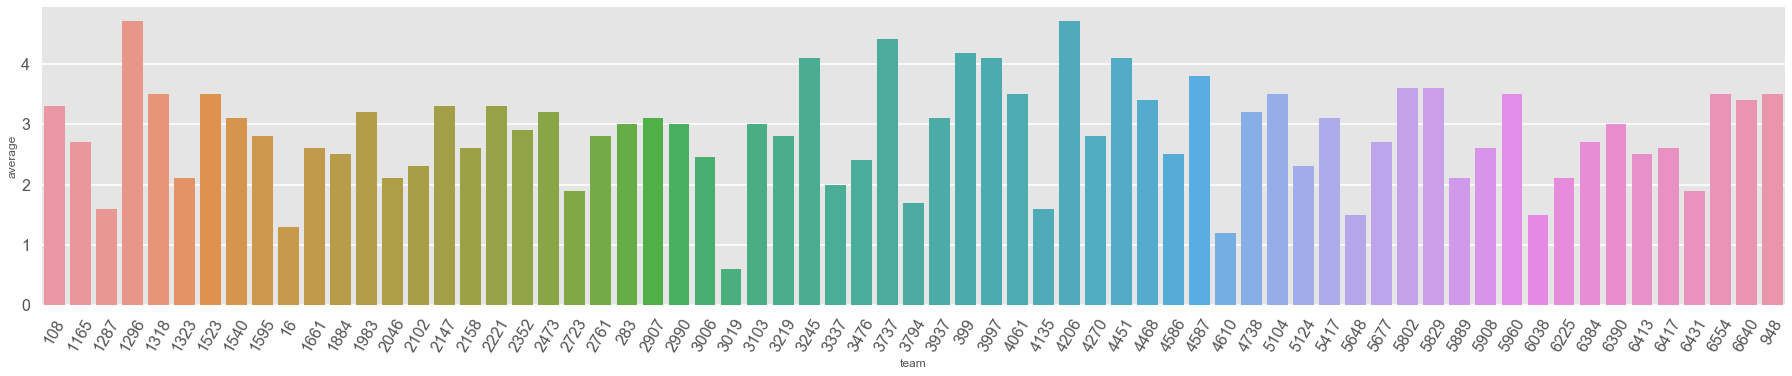

In [567]:
g= sns.factorplot(x="team", y="average", data=gears_df, kind='bar',
                  size=5, aspect= 5)#.set_title('Average Gears Placed Per Match On Turing 2017')
g.set_xticklabels(rotation=60)
g= sns.set_context("poster")
#for i, v in enumerate(gears_df["average"].iteritems()):        
    #g= sns.text(i ,v[1], "{:,}".format(v[1]), rotation=45)